In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [2]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [11]:
c= cast 
c = c[(c.character == "Superman") | (c.character == "Batman")]
c = c.groupby(['year','character']).size()
c = c.unstack().fillna(0)
c

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [13]:
d = c.Superman - c.Batman
print(d[d > 0])
print(len(d[d>0]))

year
1948    1.0
1950    1.0
1951    2.0
1954    5.0
1955    1.0
1973    1.0
1978    1.0
1980    2.0
1983    2.0
1987    1.0
2006    1.0
dtype: float64
11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [14]:
d = c.Superman - c.Batman
print(d[d < 0])
print(len(d[d<0]))

year
1938   -1.0
1940   -1.0
1943   -1.0
1949   -2.0
1953   -2.0
1957   -2.0
1965   -1.0
1966   -1.0
1967   -1.0
1988   -1.0
1989   -1.0
1993   -1.0
1998   -1.0
1999   -1.0
2004   -1.0
2005   -1.0
2009   -2.0
2010   -2.0
2011   -2.0
2012   -2.0
2013   -4.0
2014   -4.0
2015   -3.0
2016   -8.0
2017   -4.0
2018   -2.0
dtype: float64
26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot: xlabel='year'>

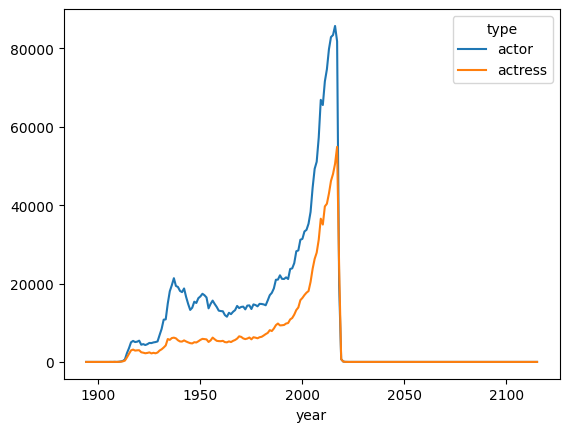

In [27]:
c = cast 
c = c.groupby(['year','type']).size()
c = c.unstack()
c.fillna(0, inplace = True)
c.plot(kind="line")

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.